# Group Project - GDP / GNI Analysis Notebook

This notebook aims to explore the hypothesis that 'Regions experiencing greater internet penetration demonstrate accelerated economic development'. The focus will be on examining the correlation between Internet Penetration and GDP/GNI per capita, and potentially the GINI Index.

Our analysis will cover two parts:
1.   Investigating the relationship between GDP/GNI and Internet Penetration.
2.   Assessing whether the rate of change in Internet Penetration aligns with GDP/GNI rate of change.

## Table of Contents
1. [Imports](#imports)
2. [Data Cleaning and Exploration](#dataexplore)
4. [Analysing the general relationship](#modeling1)
5. [Analysing the rate of change](#modeling2)
6. [Conclusion](#conclusion)

# Data and Library Imports <a name="imports"></a>
Pulling in dataset, relevant libraries and project graph styling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from scipy import stats

In [2]:
sns.set()
plt.rcdefaults()
color_list = ['#23CECC','#97D2FF','#7BCE23','#26CE23','#23CE76','#237BCE','#2325CE']

sns.set_palette(color_list)
plt.rcParams['figure.facecolor'] = '#EEFFFE'

In [3]:
data = pd.read_csv("data/internet_and_development_13122023.csv")
data

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,NaN,31.448851,4.1,0.408965,NaN,NaN,NaN
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,NaN,NaN,4.0,0.335061,NaN,NaN,NaN
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,4.04,NaN,4.0,0.298088,NaN,NaN,NaN
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,NaN,NaN,3.9,0.283692,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Kuwait,Arab States,KWT,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.27
2683,Monaco,Europe,MCO,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.26
2684,Oman,Arab States,OMN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.85
2685,Timor-Leste,Asia & Pacific,TLS,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.28


# Data Cleaning and Exploration <a name="dataexplore"></a>
Exploring and cleaning the data for the model

In [4]:
data.describe()

,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
count,2687.000000,2308.000000,2412.000000,884.000000,2472.000000,1484.000000,486.000000,1832.000000,2092.000000,1014.000000,1010.000000,580.000000
mean,2016.383699,50.272237,13843.457711,36.281109,16094.757307,5.433430,84.559205,10.147926,4.153067,38.866199,0.940395,65.232000
std,3.968388,30.179557,18794.018564,7.413993,25647.678350,1.123804,18.176748,8.916781,5.033023,29.112067,3.862910,16.239183
min,2010.000000,0.000000,210.000000,23.200000,216.827417,1.859000,22.311550,0.000000,0.025112,3.303739,0.034745,11.220000
25%,2013.000000,22.158186,1970.000000,30.700000,1979.991808,4.574750,77.382500,4.900000,0.675681,21.345510,0.102620,53.657500
50%,2016.000000,52.637869,5645.000000,35.200000,5965.291551,5.410000,93.053776,7.900000,2.535054,33.525471,0.263931,66.095000
75%,2020.000000,77.780427,16385.000000,40.925000,18133.907114,6.253500,96.962358,12.700000,5.777704,49.085861,0.626980,76.792500
max,2023.000000,100.000000,105070.000000,63.400000,234317.084818,7.842000,100.000000,92.600000,39.582140,377.906977,76.250000,99.690000


Given that we'll focus on economic metrics, we'll clean the data by removing rows with missing values, except for the year 2022. For 2022, although we lack Internet Penetration rates in most countries, this isn't a concern as the impact of the internet on GDP or GNI might not be immediately evident. Therefore, we'll retain data for 2022 despite the absence of Internet Penetration rates.

In [5]:
cond1 = data["Year"] != 2022
drop1 = data[cond1].dropna(subset=['GDP Per Capita', 'GNI per capita', 'Individuals using the Internet, total (%)'], how="any")
cond2 = (
    (data["Year"] == 2022) &
    ~ ((data["GDP Per Capita"].isnull()) | (data["GNI per capita"].isnull())))

filtered_data = pd.concat([drop1, data[cond2]])
filtered_data.isnull().sum()

Country                                         0
Region                                          0
ISO                                             0
Year                                            0
Individuals using the Internet, total (%)     121
GNI per capita                                  0
GINI Index                                   1473
GDP Per Capita                                  0
Happiness Index                              1049
Literacy                                     1873
Suicide Rates                                 592
CO2 Emissions                                 380
Internet_Price                               1345
Internet Price Ratio                         1345
Voter Turnout                                1826
dtype: int64

Text(0.5, 1.0, 'Distribution of Internet Usage by Year')

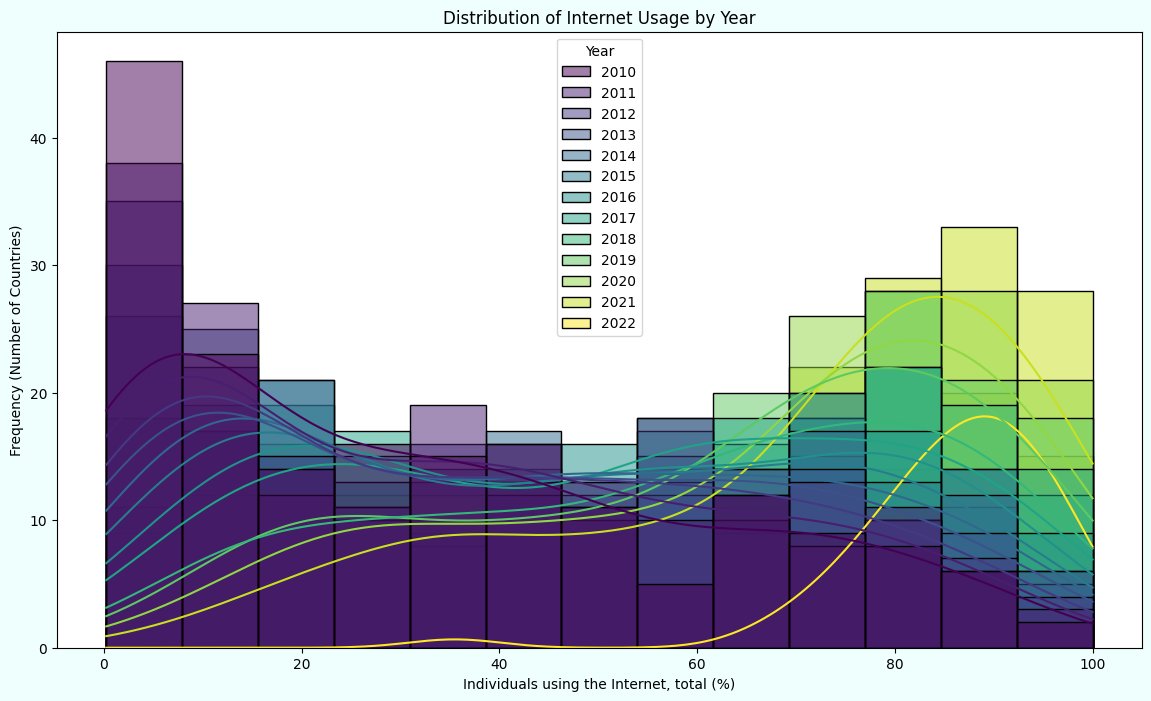

In [6]:
plt.figure(figsize=(14, 8))
sns.histplot(data = filtered_data, x = 'Individuals using the Internet, total (%)', hue = 'Year', palette='viridis', kde=True)
plt.xlabel('Individuals using the Internet, total (%)')
plt.ylabel('Frequency (Number of Countries)')
plt.title('Distribution of Internet Usage by Year')

Starting off with some initial exploration, we see a histogram above showing how the internet penetration rates have changed over the years. In just over 10 years the internet penetration rates around the world is nearly the inverse of what it was in 2010.

Trying the same but by region below to see how this might differ.

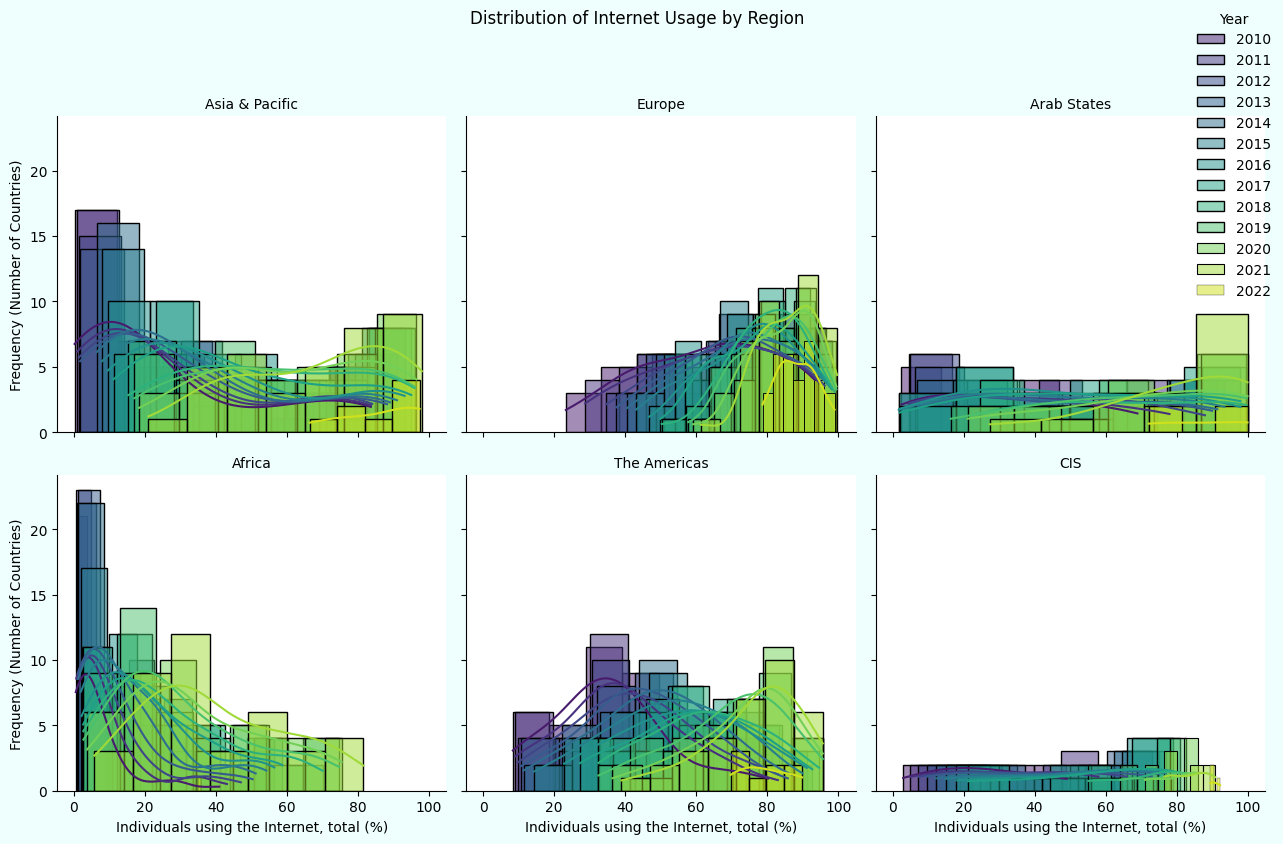

In [7]:
reg = sns.FacetGrid(filtered_data, col="Region", col_wrap=3, height=4, hue = 'Year', palette='viridis')
reg.map(sns.histplot, "Individuals using the Internet, total (%)", kde=True)
reg.set_axis_labels('Individuals using the Internet, total (%)', 'Frequency (Number of Countries)')
reg.set_titles(col_template="{col_name}")
reg.add_legend(title='Year', loc='upper right')

plt.suptitle('Distribution of Internet Usage by Region', y=1.05)
plt.tight_layout()
plt.show()

# Analysing the general relationship <a name="modeling1"></a>


Here we're analysing if the average internet penetration in the first 6 years of our dataset relates to higher GDP or GNI in the last 5 years of our dataset. To begin with we will create a dataframe with the averages.

In [8]:
data_2010_to_2016 = filtered_data[(filtered_data['Year'] >= 2010) & (filtered_data['Year'] <= 2016)]
data_2017_to_2022 = filtered_data[(filtered_data['Year'] >= 2017) & (filtered_data['Year'] <= 2022)]

avg_internet = data_2010_to_2016.groupby(['Country', 'Region'])['Individuals using the Internet, total (%)'].mean().reset_index()
avg_economic = data_2017_to_2022.groupby(['Country', 'Region'])[['GDP Per Capita', 'GNI per capita']].mean().reset_index()

averages_data = pd.merge(avg_internet, avg_economic, on=['Country', 'Region'])

averages_data = averages_data.rename(columns={
    'Individuals using the Internet, total (%)': 'Avg Internet Penetration 2010-2016',
    'GDP Per Capita': 'Avg GDP 2017-2022',
    'GNI per capita': 'Avg GNI 2017-2022'
})

averages_data

,Country,Region,Avg Internet Penetration 2010-2016,Avg GDP 2017-2022,Avg GNI 2017-2022
0,Afghanistan,Asia & Pacific,6.659221,512.399185,522.500000
1,Albania,Europe,52.000000,5622.992095,5420.000000
2,Algeria,Arab States,25.535075,3942.850949,3870.000000
3,Angola,Africa,13.542857,2219.687217,1855.000000
4,Antigua and Barbuda,The Americas,61.597143,17239.518450,16707.500000
...,...,...,...,...,...
180,Vanuatu,Asia & Pacific,14.892772,3026.374147,3300.000000
181,Viet Nam,Asia & Pacific,40.002857,3542.789792,3361.666667
182,Yemen,Arab States,19.416588,893.716573,1000.000000
183,Zambia,Africa,5.857143,1303.526137,1231.666667


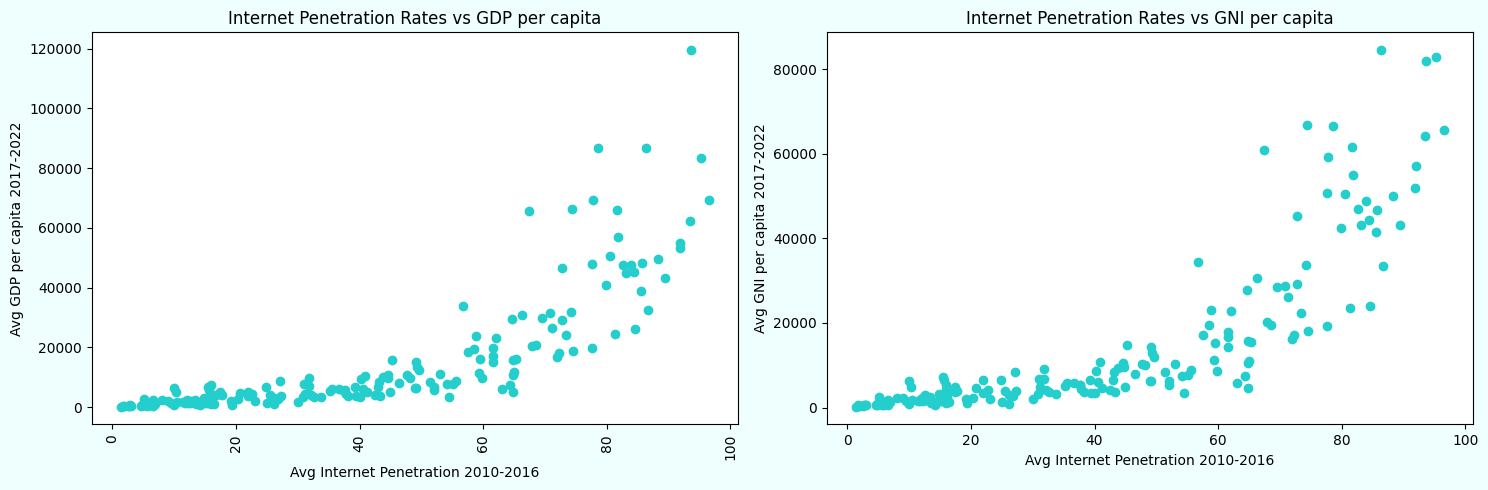

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].scatter(averages_data['Avg Internet Penetration 2010-2016'], averages_data['Avg GDP 2017-2022'])
axes[0].set_title('Internet Penetration Rates vs GDP per capita')
axes[0].set_xlabel('Avg Internet Penetration 2010-2016')
axes[0].set_ylabel('Avg GDP per capita 2017-2022')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(False)

axes[1].scatter(averages_data['Avg Internet Penetration 2010-2016'], averages_data['Avg GNI 2017-2022'])
axes[1].set_title('Internet Penetration Rates vs GNI per capita')
axes[1].set_xlabel('Avg Internet Penetration 2010-2016')
axes[1].set_ylabel('Avg GNI per capita 2017-2022')
axes[1].tick_params(axis='x')
axes[1].grid(False)

plt.tight_layout()
plt.show()


GNI appears to have a slightly better relationship with average internet penetration rates so we'll use that to make a simple exponentional model to fit this rather nice exponentional curve.

R-squared for exponential fit: 82%


Text(0.5, 1.0, 'Internet Penetration Rates vs GNI per capita, R-Squared: 82%')

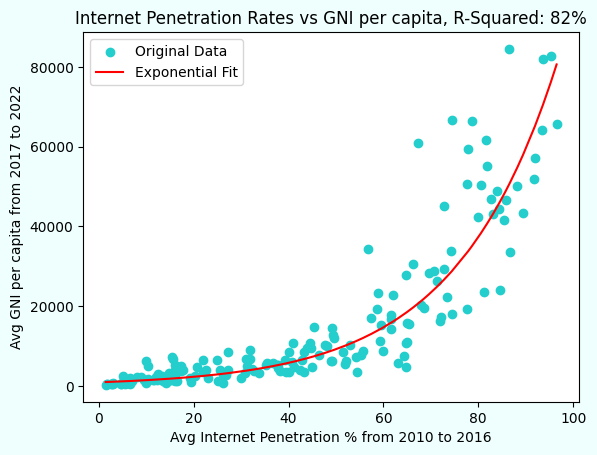

In [10]:
x_internet = averages_data['Avg Internet Penetration 2010-2016']
y_gni = averages_data['Avg GNI 2017-2022']

fit = np.polyfit(x_internet, np.log(y_gni), 1)

intercept = np.exp(fit[1])
coefficient = fit[0]

y_gni_predicted = intercept * np.exp(coefficient * x_internet)
y_mean = np.mean(y_gni)

TSS = np.sum((y_gni - y_mean)**2)
RSS = np.sum((y_gni - y_gni_predicted)**2)
R_squared = 1 - (RSS / TSS)
print("R-squared for exponential fit:", "{:.0%}".format(R_squared))

plt.scatter(x_internet, y_gni, label='Original Data')

x_sorted = np.sort(x_internet)
y_predicted_sorted = intercept * np.exp(coefficient * x_sorted)

plt.plot(x_sorted, y_predicted_sorted, color='red', label='Exponential Fit')

plt.legend()
plt.xlabel('Avg Internet Penetration % from 2010 to 2016')
plt.ylabel('Avg GNI per capita from 2017 to 2022')
plt.title(f'Internet Penetration Rates vs GNI per capita, R-Squared: {"{:.0%}".format(R_squared)}')

R-squared for exponential fit: 78%


Text(0.5, 1.0, 'Internet Penetration Rates vs GDP per capita, R-Squared: 78%')

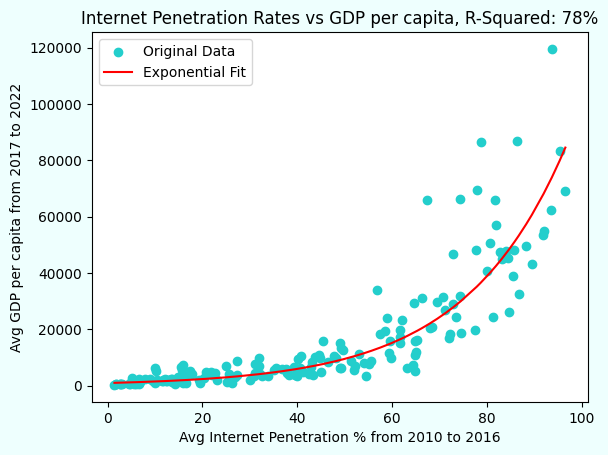

In [11]:
x_internet = averages_data['Avg Internet Penetration 2010-2016']
y_gdp = averages_data['Avg GDP 2017-2022']

fit = np.polyfit(x_internet, np.log(y_gdp), 1)

intercept = np.exp(fit[1])
coefficient = fit[0]

y_gdp_predicted = intercept * np.exp(coefficient * x_internet)
y_mean = np.mean(y_gdp)

TSS = np.sum((y_gdp - y_mean)**2)
RSS = np.sum((y_gdp - y_gdp_predicted)**2)
R_squared = 1 - (RSS / TSS)
print("R-squared for exponential fit:", "{:.0%}".format(R_squared))

plt.scatter(x_internet, y_gdp, label='Original Data')

x_sorted = np.sort(x_internet)
y_predicted_sorted = intercept * np.exp(coefficient * x_sorted)

plt.plot(x_sorted, y_predicted_sorted, color='red', label='Exponential Fit')

plt.legend()
plt.xlabel('Avg Internet Penetration % from 2010 to 2016')
plt.ylabel('Avg GDP per capita from 2017 to 2022')
plt.title(f'Internet Penetration Rates vs GDP per capita, R-Squared: {"{:.0%}".format(R_squared)}')

And indeed internet penetration rates has a slightly stronger relationship wtih GNI than GDP. With and 82% and 78% R Squared this is quite a strong relationship considering these are socio-economic factors which have a lot of other nonscientific inputs which effect it.

A stronger relationship between GNI and internet penetration rates might imply that the availability and utilization of the internet have a more direct impact on individual economic power or wealth (as indicated by GNI) than the broader economic output represented by GDP.

We can also explore how this would look by the various Regions:

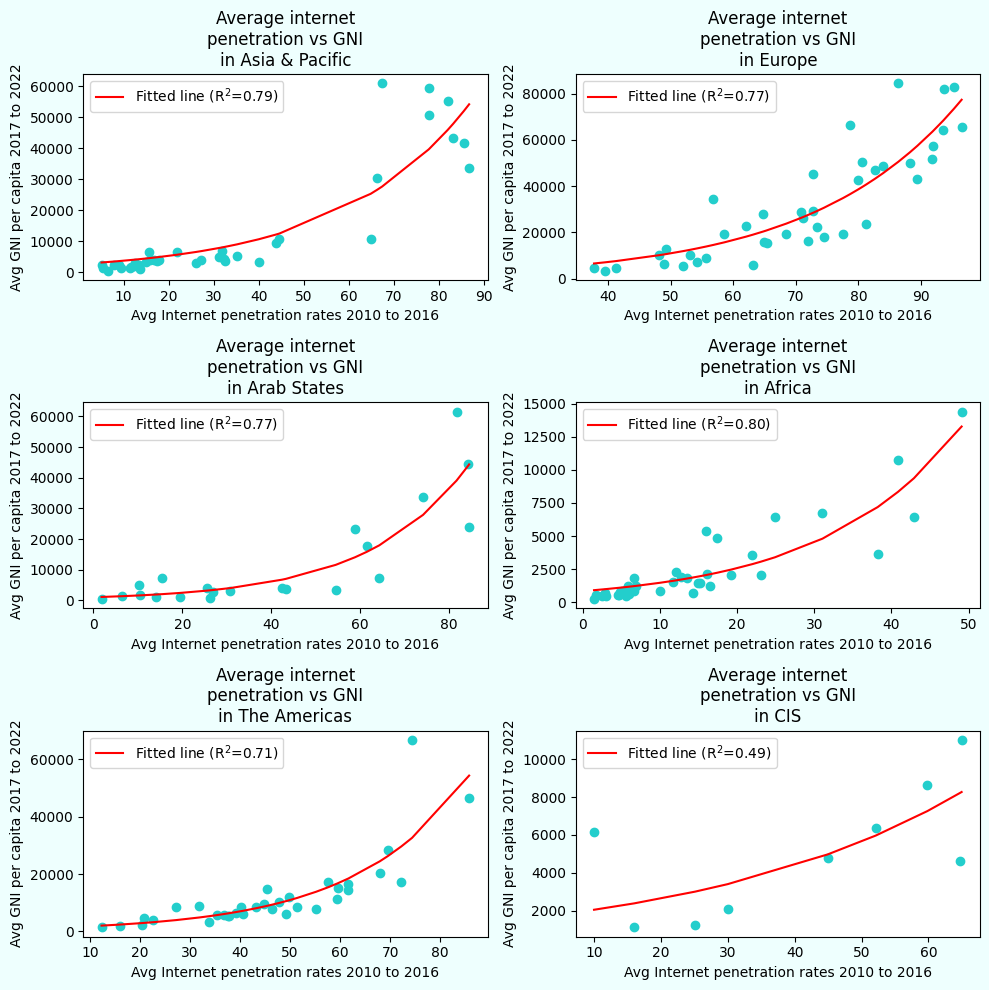

In [12]:
from scipy.optimize import curve_fit

regions = averages_data["Region"].unique()

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

def exponential_func(x, a, b):
    return a * np.exp(b * x)

for idx, region in enumerate(regions):
    group_data = averages_data[averages_data["Region"] == region]
    ax = axs[idx // 2, idx % 2]
    x = group_data['Avg Internet Penetration 2010-2016']
    y = group_data['Avg GNI 2017-2022']

    valid_indices = np.isfinite(x) & np.isfinite(y)
    x_clean = x[valid_indices]
    y_clean = y[valid_indices]

    sorted_indices = np.argsort(x_clean)
    x_sorted = x_clean.iloc[sorted_indices]
    y_sorted = y_clean.iloc[sorted_indices]

    ax.scatter(x_sorted, y_sorted)

    initial_guess = [1, 0.1]
    popt, pcov = curve_fit(exponential_func, x_sorted, y_sorted, p0=initial_guess)
    y_fit = exponential_func(x_sorted, *popt)

    residuals = y_sorted - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_sorted - np.mean(y_sorted))**2)
    r_squared = 1 - (ss_res / ss_tot)

    ax.plot(x_sorted, y_fit, color='red', label=f'Fitted line (R$^2$={r_squared:.2f})')

    wrapped_title = '\n'.join(textwrap.wrap(f'Average internet penetration vs GNI in {region}', width=20))
    ax.set_title(wrapped_title)
    ax.set_xlabel('Avg Internet penetration rates 2010 to 2016')
    ax.set_ylabel('Avg GNI per capita 2017 to 2022')
    ax.legend()

plt.tight_layout()
plt.show()


We can see that in Africa this relationship is the strongest while its weakest in the CIS.

# Analysing the rate of change relationship <a name="modeling2"></a>

Now we want to look at the rate of change from one year to the next of Internet, GDP and GNI and explore that relationship.

In [13]:
rate_data = filtered_data.drop(columns = ["Happiness Index", "Literacy", "Suicide Rates", "CO2 Emissions", "Internet_Price", "Internet Price Ratio","Voter Turnout"])
rate_data.sort_values(['Country', 'Year'], inplace=True)
rate_data['Rate of Change Internet'] = rate_data.groupby('Country')['Individuals using the Internet, total (%)'].pct_change() * 100
rate_data['Rate of Change GDP'] = rate_data.groupby('Country')['GDP Per Capita'].pct_change() * 100
rate_data['Rate of Change GNI'] = rate_data.groupby('Country')['GNI per capita'].pct_change() * 100
rate_data['Rate of Change GINI'] = rate_data.groupby('Country')['GINI Index'].pct_change() * 100

rate_data

/var/folders/v4/fzvn3vnd4jg427pq437v42j80000gn/T/ipykernel_80311/2857783998.py:3: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rate_data['Rate of Change Internet'] = rate_data.groupby('Country')['Individuals using the Internet, total (%)'].pct_change() * 100
/var/folders/v4/fzvn3vnd4jg427pq437v42j80000gn/T/ipykernel_80311/2857783998.py:6: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rate_data['Rate of Change GINI'] = rate_data.groupby('Country')['GINI Index'].pct_change() * 100


,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Rate of Change Internet,Rate of Change GDP,Rate of Change GNI,Rate of Change GINI
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,NaN,NaN
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,25.000000,12.138175,5.769231,NaN
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,9.090909,6.629332,18.181818,NaN
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,8.166667,-1.681873,4.615385,NaN
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,18.644068,-3.656672,-4.411765,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2536,Zimbabwe,Africa,ZWE,2018,25.000000,1550.0,NaN,2269.177012,2.459016,90.350110,32.478632,0.000000
2537,Zimbabwe,Africa,ZWE,2019,26.588274,1450.0,50.3,1421.868596,6.353096,-37.339900,-6.451613,13.544018
2538,Zimbabwe,Africa,ZWE,2020,29.298565,1460.0,NaN,1372.696674,10.193558,-3.458261,0.689655,0.000000
2539,Zimbabwe,Africa,ZWE,2021,34.813971,1530.0,NaN,1773.920411,18.824831,29.228871,4.794521,0.000000


Now we need to have a look at the distribution of these rate of changes metrics.

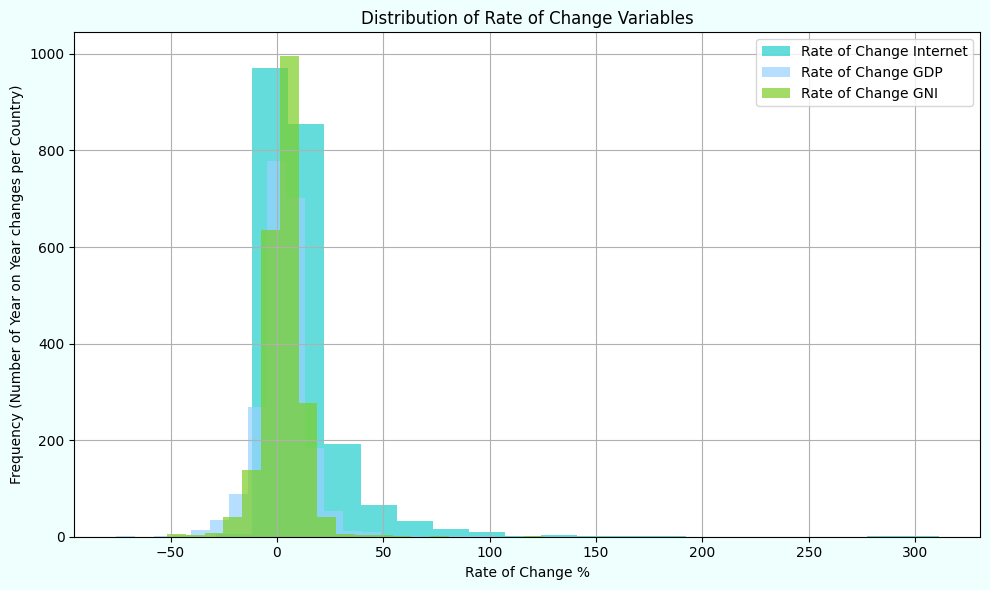

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(rate_data['Rate of Change Internet'], bins=20, alpha=0.7, label='Rate of Change Internet')
plt.hist(rate_data['Rate of Change GDP'], bins=20, alpha=0.7, label='Rate of Change GDP')
plt.hist(rate_data['Rate of Change GNI'], bins=20, alpha=0.7, label='Rate of Change GNI')
plt.xlabel('Rate of Change %')
plt.ylabel('Frequency (Number of Year on Year changes per Country)')
plt.title('Distribution of Rate of Change Variables')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The distributions appear quite balanced overall, yet the Internet Rate of Change seems to have a lengthy tail, indicating potential outliers that may require further analysis.

In [15]:
rate_data.describe()

,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Rate of Change Internet,Rate of Change GDP,Rate of Change GNI,Rate of Change GINI
count,2348.000000,2227.000000,2348.000000,875.000000,2348.000000,2157.000000,2157.000000,2157.000000,1551.000000
mean,2015.945911,50.118935,14060.971039,36.265829,14592.871607,11.962399,3.075065,2.928730,-0.270040
std,3.738019,29.904027,18969.897785,7.429950,20335.491234,19.466802,11.840461,9.459112,3.002336
min,2010.000000,0.250000,210.000000,23.200000,216.827417,-28.611872,-75.856857,-51.698113,-31.410256
25%,2013.000000,22.400000,1980.000000,30.650000,1979.991808,1.913888,-2.110217,-1.724138,-0.279338
50%,2016.000000,51.919116,5655.000000,35.200000,5871.398577,6.328642,3.481792,3.366222,0.000000
75%,2019.000000,77.384432,16802.500000,40.900000,17681.157797,14.626490,8.715825,7.830552,0.000000
max,2022.000000,100.000000,105070.000000,63.400000,133590.146976,311.111111,102.532759,125.040128,32.142857


There are clearly some quite drastic jumps between thre 75% percentile (14 for Internet and 8ish for GDP and GNI) and the max (300+ for Internet and over 100 for GDP/GNI)

In [16]:
percentile_internet = rate_data['Rate of Change Internet'].quantile(0.99)
percentile_gdp = rate_data['Rate of Change GDP'].quantile(0.99)
percentile_gni = rate_data['Rate of Change GNI'].quantile(0.99)

condition_internet = rate_data[rate_data['Rate of Change Internet'] >= percentile_internet]
condition_internet

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Rate of Change Internet,Rate of Change GDP,Rate of Change GNI,Rate of Change GINI
239,Benin,Africa,BEN,2015,11.254988,1140.0,47.8,1041.652523,87.583132,-16.767994,-7.317073,10.138249
289,Botswana,Africa,BWA,2013,30.000000,7020.0,NaN,6436.603063,87.500000,0.682243,4.776119,NaN
380,Cambodia,Asia & Pacific,KHM,2011,3.100000,810.0,NaN,880.310304,146.031746,12.471585,8.000000,NaN
383,Cambodia,Asia & Pacific,KHM,2014,14.000000,1020.0,NaN,1098.074538,133.333333,8.161146,6.250000,NaN
492,Comoros,Arab States,COM,2019,16.383751,1520.0,NaN,1510.797323,93.246310,6.801325,10.948905,0.000000
581,Côte d'Ivoire,Africa,CIV,2016,41.207815,2020.0,NaN,1999.195372,146.753383,2.967347,0.497512,0.000000
705,Equatorial Guinea,Africa,GNQ,2011,11.500000,9950.0,NaN,18659.416036,91.666667,25.184649,15.697674,NaN
757,Ethiopia,Africa,ETH,2012,2.900000,400.0,NaN,458.550921,163.636364,31.766995,5.263158,0.000000
913,Guinea,Africa,GIN,2011,2.000000,670.0,NaN,644.502549,100.000000,-3.413709,-2.898551,NaN
931,Guinea-Bissau,Africa,GNB,2016,13.800000,640.0,NaN,642.666390,126.229508,9.678078,3.225806,0.000000


Here we can see the top 99th percentile of results for Internet Rate change and now we should look at some specific examples.

In [17]:
rate_data[rate_data["Country"]=="Myanmar"]

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Rate of Change Internet,Rate of Change GDP,Rate of Change GNI,Rate of Change GINI
1576,Myanmar,Asia & Pacific,MMR,2010,0.250000,630.0,NaN,765.241889,NaN,NaN,NaN,NaN
1577,Myanmar,Asia & Pacific,MMR,2011,0.980000,820.0,NaN,1086.838467,292.000000,42.025480,30.158730,NaN
1578,Myanmar,Asia & Pacific,MMR,2012,1.400000,1010.0,NaN,1161.305962,42.857143,6.851754,23.170732,NaN
1579,Myanmar,Asia & Pacific,MMR,2013,1.800000,1190.0,NaN,1195.937800,28.571429,2.982146,17.821782,NaN
1580,Myanmar,Asia & Pacific,MMR,2014,7.400000,1240.0,NaN,1238.728710,311.111111,3.578021,4.201681,NaN
1581,Myanmar,Asia & Pacific,MMR,2015,10.900000,1200.0,38.1,1224.562368,47.297297,-1.143619,-3.225806,NaN
1582,Myanmar,Asia & Pacific,MMR,2016,16.000000,1230.0,NaN,1161.861818,46.788991,-5.120241,2.500000,0.000000
1583,Myanmar,Asia & Pacific,MMR,2017,23.621082,1210.0,30.7,1175.202555,47.631762,1.148221,-1.626016,-19.422572
1584,Myanmar,Asia & Pacific,MMR,2018,28.700000,1250.0,NaN,1274.915663,21.501632,8.484759,3.305785,0.000000
1585,Myanmar,Asia & Pacific,MMR,2019,30.635365,1300.0,NaN,1295.201487,6.743433,1.591150,4.000000,0.000000


Looking at a few countries in the above results, it seems like very reasonable behaviour due to the fact that the internet penetration was so low to begin with that the rate of change could be massive from some year to the next. Considering this, we will segment the analysis, not by regions but by the 2010 internet penetration levels within a country, categorizing them into Low, Medium, and High Internet Penetration brackets. The groups will likely behave very differently i.e. if the starting Internet Penetration Rate is very low than a jump of a 100% would not be that uncommon. We will look at the distribution of the starting Internet Penetration Rates (in 2010) to decide on the definitions for low, medium, high groupings.

In [18]:
data_internet_start = rate_data[rate_data["Year"]==2010]
data_internet_start.shape

(183, 12)

Looking at the distribution of the 2010 internet penetration rates to decide on buckets:

Text(0.5, 1.0, 'Distribution of Internet Rates in 2010')

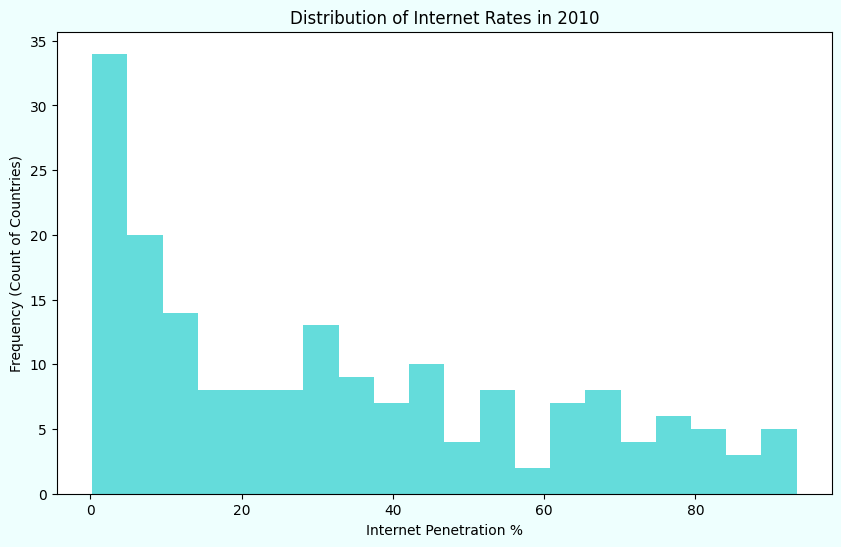

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(data_internet_start['Individuals using the Internet, total (%)'], bins=20, alpha=0.7, label='Internet Penetration 2010 Distribution')
plt.xlabel('Internet Penetration %')
plt.ylabel('Frequency (Count of Countries)')
plt.title('Distribution of Internet Rates in 2010')

Text(95.7222222222222, 0.5, 'Country')

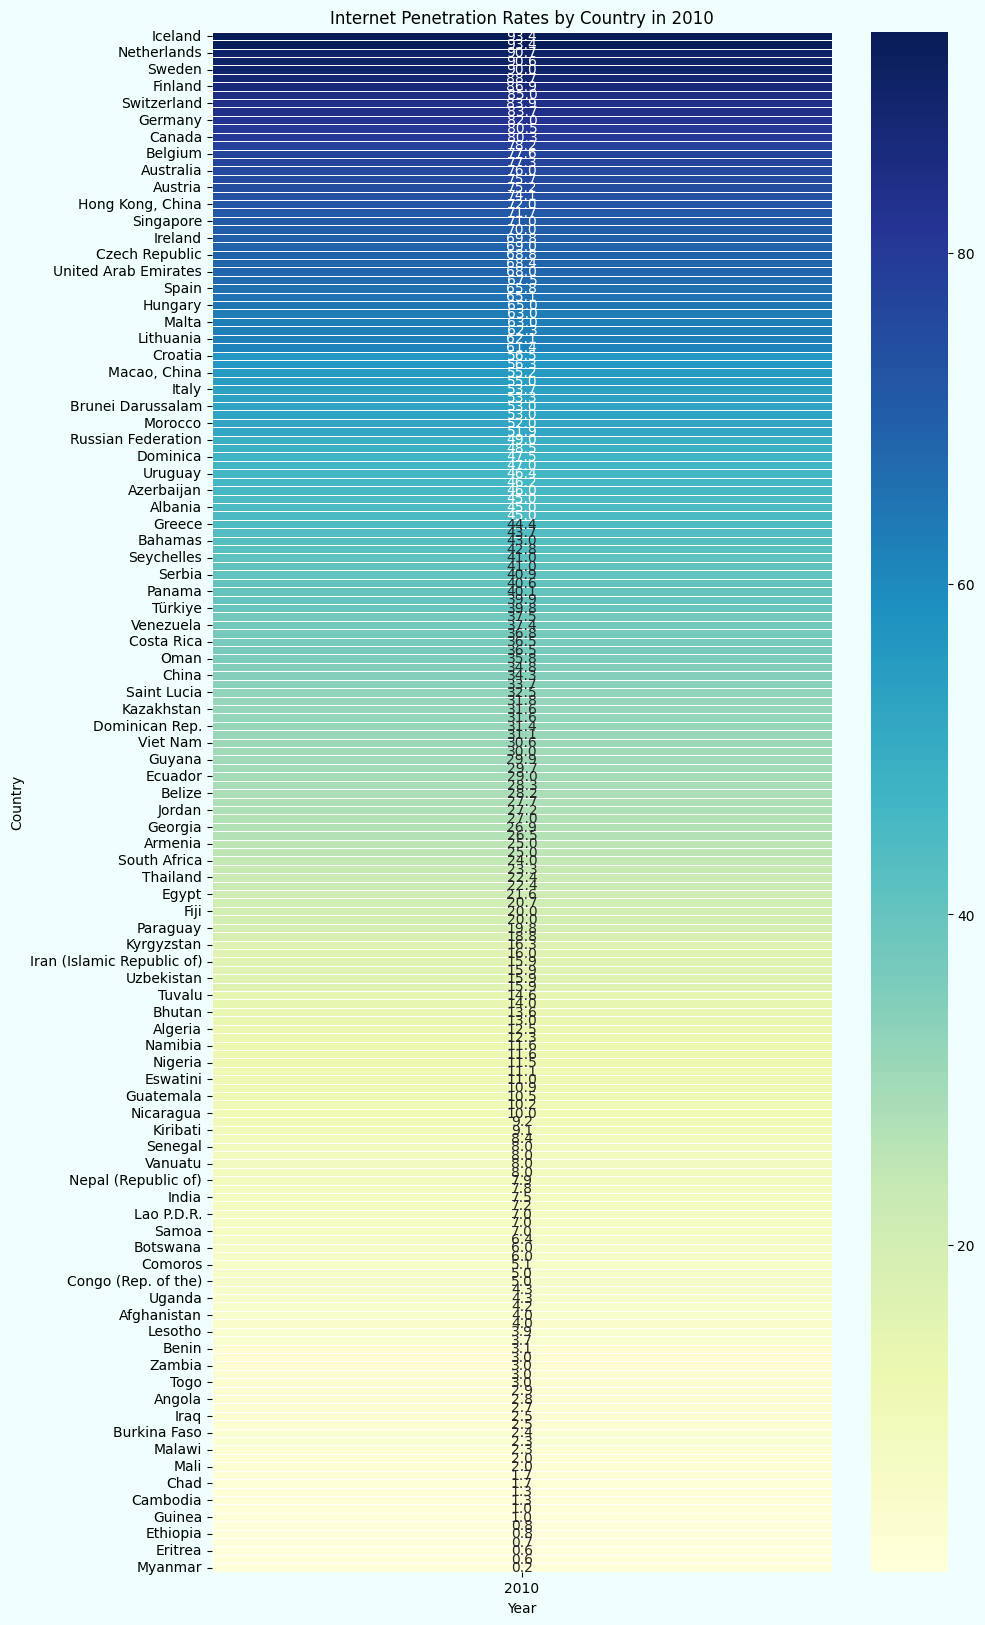

In [20]:
heatmap_data = data_internet_start.pivot(index='Country', columns='Year', values='Individuals using the Internet, total (%)')

heatmap_data_sorted = heatmap_data.sort_values(by=2010, ascending=False)


plt.figure(figsize=(10, 20))
sns.heatmap(heatmap_data_sorted, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Internet Penetration Rates by Country in 2010')
plt.xlabel('Year')
plt.ylabel('Country')


Looking at these two distribution visualisations we will try the following groups:
- Low Internet = Less than 15%
- Medium Internet = 15% to 45%
- High Internet = 45%+

In [21]:
internet_penetration_groupings = data_internet_start[['Country', 'Individuals using the Internet, total (%)']].copy()

bins = [0, 15, 45, 100]
labels = ['Low Internet', 'Medium Internet', 'High Internet']

internet_penetration_groupings['Internet Group'] = pd.cut(internet_penetration_groupings['Individuals using the Internet, total (%)'], bins=bins, labels=labels)

rate_data_gr = pd.merge(rate_data, internet_penetration_groupings[['Country', 'Internet Group']], on='Country')
rate_data_gr

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Rate of Change Internet,Rate of Change GDP,Rate of Change GNI,Rate of Change GINI,Internet Group
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,NaN,NaN,Low Internet
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,25.000000,12.138175,5.769231,NaN,Low Internet
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,9.090909,6.629332,18.181818,NaN,Low Internet
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,8.166667,-1.681873,4.615385,NaN,Low Internet
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,18.644068,-3.656672,-4.411765,NaN,Low Internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,Zimbabwe,Africa,ZWE,2018,25.000000,1550.0,NaN,2269.177012,2.459016,90.350110,32.478632,0.000000,Low Internet
2304,Zimbabwe,Africa,ZWE,2019,26.588274,1450.0,50.3,1421.868596,6.353096,-37.339900,-6.451613,13.544018,Low Internet
2305,Zimbabwe,Africa,ZWE,2020,29.298565,1460.0,NaN,1372.696674,10.193558,-3.458261,0.689655,0.000000,Low Internet
2306,Zimbabwe,Africa,ZWE,2021,34.813971,1530.0,NaN,1773.920411,18.824831,29.228871,4.794521,0.000000,Low Internet


Checking that our groups are more or less balanced, and generally happy with this outcome.

In [22]:
unique_countries = rate_data_gr.drop_duplicates(subset='Country')
count_by_group = unique_countries['Internet Group'].value_counts()
count_by_group

Internet Group
Low Internet       69
Medium Internet    59
High Internet      55
Name: count, dtype: int64

So now we have relatively balanced groups and we'll try the analysis based on these groups.

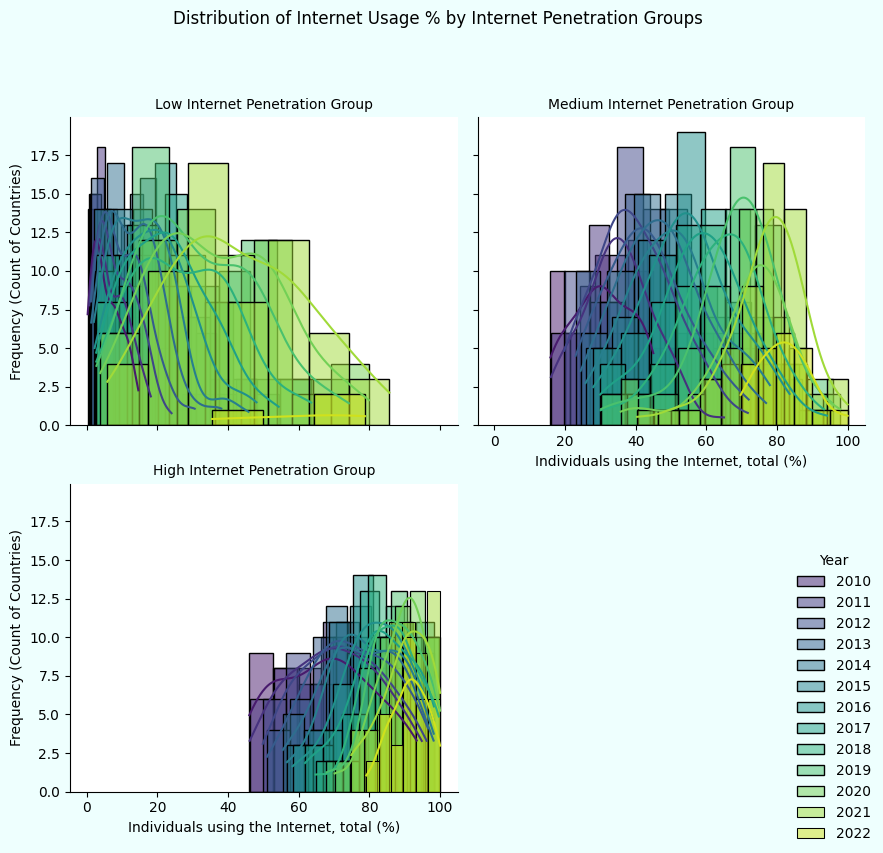

In [23]:
reg = sns.FacetGrid(rate_data_gr, col="Internet Group", col_wrap=2, height=4, hue = 'Year', palette='viridis')
reg.map(sns.histplot, "Individuals using the Internet, total (%)", kde=True)
reg.set_axis_labels('Individuals using the Internet, total (%)', 'Frequency (Count of Countries)')
reg.set_titles(col_template="{col_name}"+" Penetration Group")
reg.add_legend(title='Year', loc='lower right')

plt.suptitle('Distribution of Internet Usage % by Internet Penetration Groups', y=1.05)
plt.tight_layout()
plt.show()

Now computing averages of the rate of changes metrics and merging into dataframe for analysis

In [24]:
country_means = rate_data_gr.groupby('Country').agg({
    'Rate of Change Internet': 'mean',
    'Rate of Change GDP': 'mean',
    'Rate of Change GNI': 'mean',
    'Rate of Change GINI': 'mean'
}).reset_index()

averages_rt_df = pd.merge(country_means, rate_data_gr[['Country', 'Region', 'Internet Group']].drop_duplicates(), on='Country', how='left')
averages_rt_df

,Country,Rate of Change Internet,Rate of Change GDP,Rate of Change GNI,Rate of Change GINI,Region,Internet Group
0,Afghanistan,16.855263,-0.487670,-0.126072,NaN,Asia & Pacific,Low Internet
1,Albania,5.202280,4.672968,3.912194,0.368249,Europe,Medium Internet
2,Algeria,15.936543,0.326501,-0.874242,0.000000,Arab States,Low Internet
3,Angola,25.771666,3.363705,-2.731568,0.000000,Africa,Low Internet
4,Antigua and Barbuda,7.701675,3.769219,3.871644,NaN,The Americas,High Internet
...,...,...,...,...,...,...,...
178,Venezuela,11.333112,5.742931,2.862243,NaN,The Americas,Medium Internet
179,Viet Nam,8.332351,7.902620,9.512112,-0.500899,Asia & Pacific,Medium Internet
180,Yemen,11.812563,-3.735668,-1.037706,0.000000,Arab States,Low Internet
181,Zambia,18.078106,1.500799,-0.439628,0.625000,Africa,Low Internet


Now creating Internet Groups to plot separately

In [25]:
averages_rt_df.to_csv('averages_rt_df.csv', index=False)

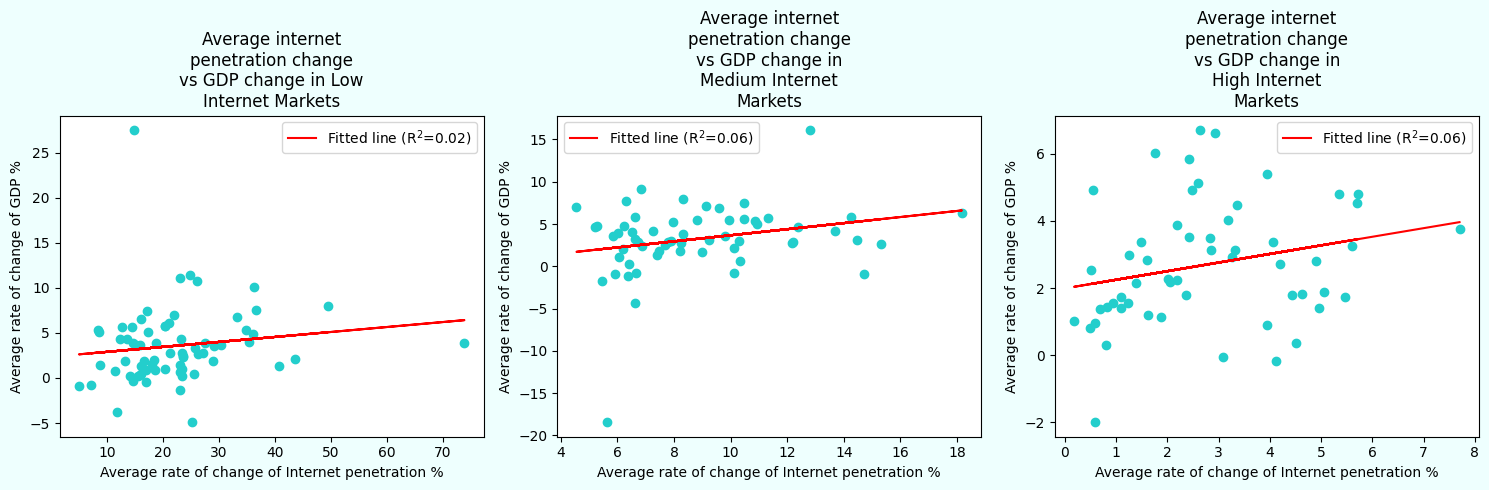

In [26]:
import textwrap
groups = averages_rt_df["Internet Group"].unique()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for idx, group in enumerate(groups):
    group_data = averages_rt_df[averages_rt_df["Internet Group"] == group]
    ax = axs[idx]

    x = group_data['Rate of Change Internet']
    y = group_data['Rate of Change GDP']

    ax.scatter(x, y)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    ax.plot(x, slope * x + intercept, color='red', label=f'Fitted line (R$^2$={r_value**2:.2f})')

    wrapped_title = '\n'.join(textwrap.wrap(f'Average internet penetration change vs GDP change in {group} Markets', width=20))
    ax.set_title(wrapped_title)
    ax.set_xlabel('Average rate of change of Internet penetration %')
    ax.set_ylabel('Average rate of change of GDP %')
    ax.legend()

plt.tight_layout()
plt.show()


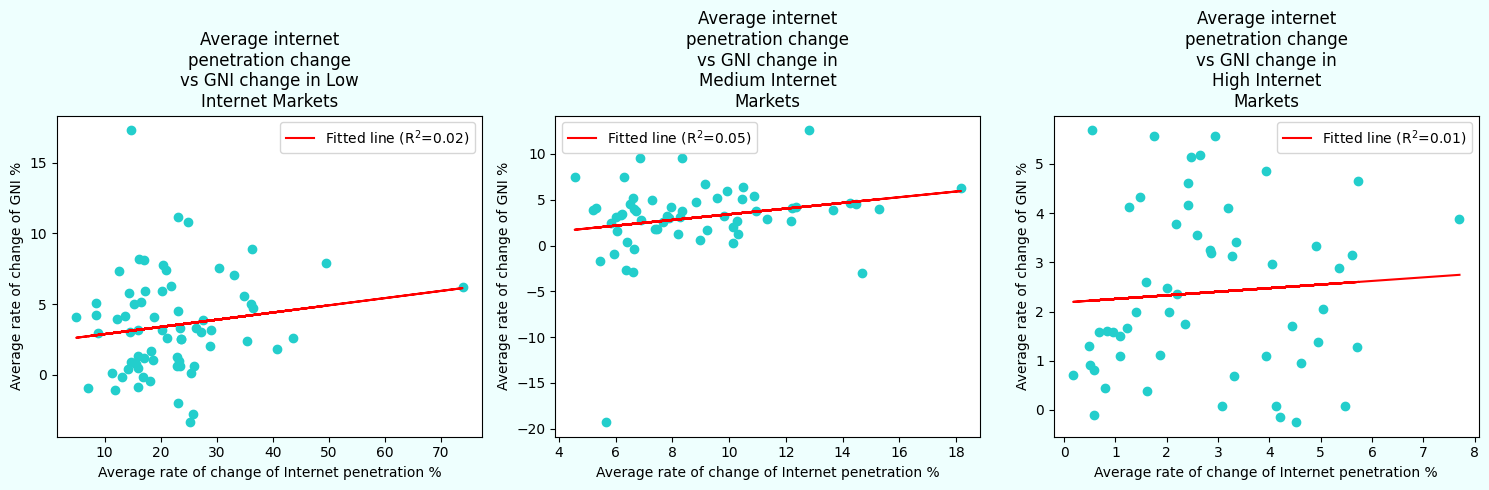

In [27]:
groups = averages_rt_df["Internet Group"].unique()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for idx, group in enumerate(groups):
    group_data = averages_rt_df[averages_rt_df["Internet Group"] == group]
    ax = axs[idx]

    x = group_data['Rate of Change Internet']
    y = group_data['Rate of Change GNI']

    ax.scatter(x, y)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    ax.plot(x, slope * x + intercept, color='red', label=f'Fitted line (R$^2$={r_value**2:.2f})')

    wrapped_title = '\n'.join(textwrap.wrap(f'Average internet penetration change vs GNI change in {group} Markets', width=20))
    ax.set_title(wrapped_title)
    ax.set_xlabel('Average rate of change of Internet penetration %')
    ax.set_ylabel('Average rate of change of GNI %')
    ax.legend()

plt.tight_layout()
plt.show()

There does appear to be a very faint linear relationship in each of these groups, although High Internet group looks particularly random.
While there are one or two outliers in the Low and Medium Internet groups, having tried previously to remove them, the relationship does not improve.

Looking instead at a group level of how the average rate of change in internet penetration and the average rate of GDP and GNI compare across groups.

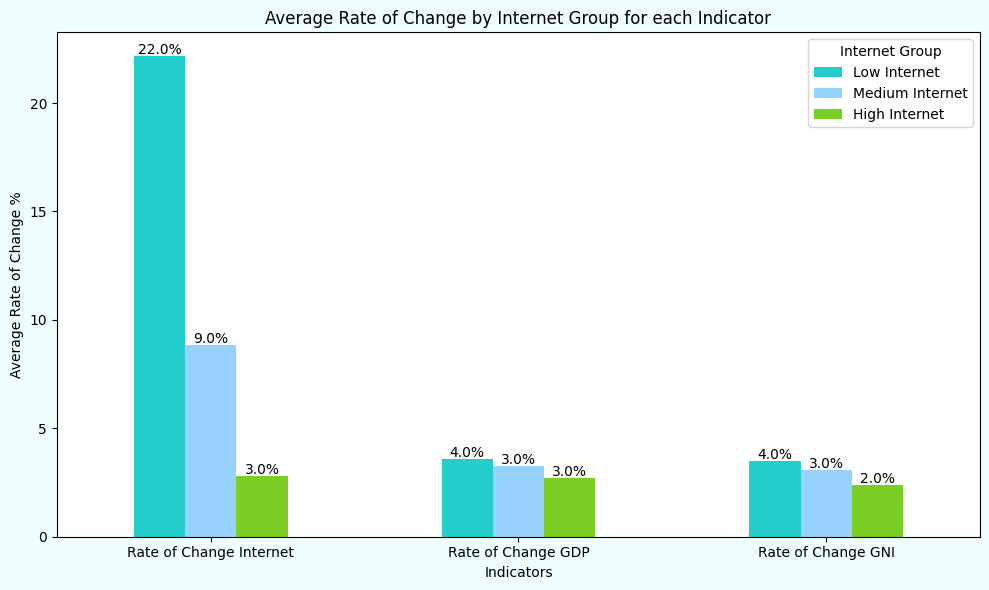

In [28]:
rate_columns = ['Rate of Change Internet', 'Rate of Change GDP', 'Rate of Change GNI']
averages_rt_df[rate_columns] = averages_rt_df[rate_columns].apply(pd.to_numeric, errors='coerce')

grouped = averages_rt_df.groupby('Internet Group', observed=True)[rate_columns].mean()

ax = grouped.transpose().plot(kind='bar', figsize=(10, 6))
plt.title('Average Rate of Change by Internet Group for each Indicator')
plt.xlabel('Indicators')
plt.ylabel('Average Rate of Change %')
plt.xticks(rotation=0)
plt.legend(title='Internet Group')

for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f"{round(i.get_height(), 0)}%", ha='center')

plt.tight_layout()
plt.show()

So here we can see that countries which in 2010 had the lowest internet penetration rates have had the largest rate of increase on average across countries of internet penetration and also GDP and GNI per capita. While countries which had the highest internet penetration rates in 2010 have had the lowest % increase in internet penetration, GDP and GNI.

# Conclusion <a name="conclusion"></a>

There is a strong exponential relationship between the countries average internet penetration from 2010 to 2016 and their average GDP and GNI per capita from 2017 to 2022.
While there is no clear relationship between the country-level year-on-year rate of change of internet penetration and their rate of change of GDP and GNI per capita, when splitting the countries into 3 groups depending on their internet penetration at the starting point of the dataset we do the following pattern:
- Countries who had the lowest internet penetration in 2010 on average saw the highest rate of increase of internet penetration and highest rate of increase in GDP and GNI
- Countries who had the highest internet penetration in 2010 on average saw the lowest rate of increase of internet penetration and the lowest rate of increase in GDP and GNI
- Countries who had were grouped as having 'medium' internet penetration in 2010, had the middle results for all 3 indicators.